# Predicting Video Game Sales


## Introduction
The goal of this project is to extract patterns from video game sales in relation to their developers, ratings, and various scores from both critics and users.
The data we are using is extracted from Kaggle - https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/

## Set Up
First thing is importing all the packages we need to manipulate the data and find meaningful patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

sales.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Manipulation
Then lets try to fill in the blanks for the NaN values here

In [2]:
#for better viewing
pd.set_option('display.max_rows', 100)

#I noticed from trying to manipulate the user score column that none of the typical functions would work
#I investigated and found that the data type is object because there was "tbd" in the numerical column

#Replaces "tbd" with NaN values
sales['User_Score'] = sales['User_Score'].replace({'tbd': np.nan})
#Convert to float
sales['User_Score'] = pd.to_numeric(sales['User_Score'], errors='raise')

# set the critic score, ciritc count, user score, user count to the mean score
sales['Critic_Score'] = sales['Critic_Score'].fillna(sales["Critic_Score"].mean())
sales['Critic_Count'] = sales['Critic_Count'].fillna(sales["Critic_Count"].mean())
sales['User_Score'] = sales['User_Score'].fillna(sales["User_Score"].mean())
sales['User_Count'] = sales['User_Count'].fillna(sales["User_Count"].mean())


#the year of release also has "N/A" in its column
#Replaces "N/A" with NaN values
sales['Year_of_Release'] = sales['Year_of_Release'].replace({'N/A': np.nan})
#since there are no good replacements values, lets drop these
sales = sales.dropna(subset=['Year_of_Release'])

#need a copy to retrieve original data for a modified version of the dataset.
sales_copy = sales.copy()


sales.head(100)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125046,162.229908,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,68.967679,26.360821,7.125046,162.229908,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.500000,431.000000,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.600000,129.000000,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,8.400000,594.000000,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,68.967679,26.360821,7.125046,162.229908,NaN,NaN


## Graphs

### Graph 1
We use the correlation graph to look into any relationship between numerical data.
Hypothesis: the critic & user score & count should be positively correlated with the various sales, due to high rating and popularity

/var/folders/dm/4n3z0t310nsc78l8052lbflr0000gn/T/ipykernel_42719/3248368590.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr() # Get the correlation matrix


<Axes: >

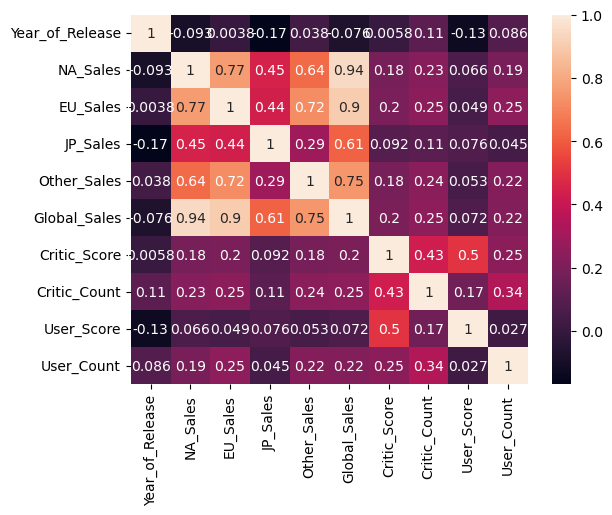

In [3]:
corr = sales.corr() # Get the correlation matrix
sns.heatmap(corr, annot=True) # Although it is called heatmap here, it nonetheless shows the pairwise correlation between features.

### Conclusion
Surprisingly, none of the review scores and counts had any strong correlation with sales from any area, with the correlation coefficients not even exceeding 0.3.
The ones that do have significant correlation do not have significant meaning: either 
This might mean that these metrics are not useful for our model



## More Preprocess
Looking at the graph results, we have concluded that 
1. the time of release and critic reviews don't really matter
Looking at the table, we have concluded that
2. the developer and rating column are missing a considerable amount of data that cannot be easily filled in

So let's drop these data

In [4]:
sales = sales.drop(columns=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count','Developer','Rating'])
sales.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Let's also cut the regional sales since we don't want to produce sales from sales

In [5]:
sales = sales.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
sales.head()

,Name,Platform,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,82.53
1,Super Mario Bros.,NES,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,35.52
3,Wii Sports Resort,Wii,Sports,Nintendo,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.37


### Graph 2
Hypothesis: Another important factor in sales would be the publisher making the game.
We can examine how the publisher influences game sales by taking averages of their game sales: total sales / total games made, and use a bar graph to compare between different developers; requiring some more data manipulation before we proceed.

                     Publisher  Global_Sales
387                     Palcom      4.170000
426                    Red Orb      2.620000
361                   Nintendo      2.552457
40         Arena Entertainment      2.360000
524                UEP Systems      2.250000
..                         ...           ...
76                    Boost On      0.010000
321                Michaelsoft      0.010000
195                Genterprise      0.010000
379                    Otomate      0.010000
133  EON Digital Entertainment      0.010000

[579 rows x 2 columns]


/var/folders/dm/4n3z0t310nsc78l8052lbflr0000gn/T/ipykernel_42719/550220673.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  publisher_sales = sales.groupby('Publisher').mean().reset_index()


<BarContainer object of 579 artists>

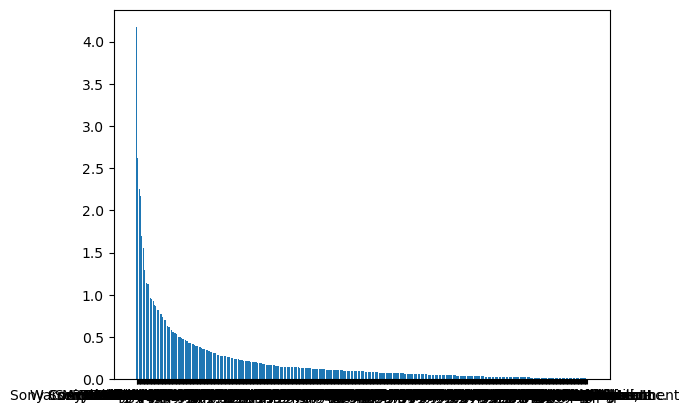

In [6]:
# #make a collection of unique publishers
# publishers = pd.DataFrame(sales['Publisher'].drop_duplicates())

# #reset the index numbers for looping
# publishers.reset_index(drop=True, inplace=True)

# #make a collection of total sales first
# publishers['Total_Sales'] = 0
# publishers['Average_Sales'] = 0

# for ind in publishers.index:
#     game_num = 0
#     for sales_ind in sales.index:
#         if (publishers['Publisher'][ind] == sales['Publisher'][sales_ind]):
#             #add the sales of the game to the total sales of the publisher
#             publishers['Total_Sales'][ind] += sales.loc[sales_ind, ('Global_Sales')]
#             game_num += 1
#     #average sales
#     publishers['Average_Sales'][ind] = publishers['Total_Sales'][ind] / game_num

# #Rank in terms of average sales
# publishers.sort_values('Average_Sales', ascending=False)

# bar1 = publishers['Average_Sales'][0]
# bar2 = publishers['Average_Sales'][1]
# bar3 = publishers['Average_Sales'][2]
# bar4 = publishers['Average_Sales'][3]
# bar5 = publishers['Average_Sales'][4]

# #plot the top 5 publishers
# plt.bar([0,1,2,3,4],[bar1,bar2,bar3,bar4,bar5])
# plt.xticks([0,1,2,3,4],[publishers['Publisher'][0],
#                         publishers['Publisher'][1],
#                         publishers['Publisher'][2],
#                         publishers['Publisher'][3],
#                         publishers['Publisher'][4]])
# plt.ylabel('Average Game Sales(millions)')

# plt.xticks(rotation=45)
# plt.show()



#found a much faster way to calculate total sales: groupby
publisher_sales = sales.groupby('Publisher').mean().reset_index()
publisher_sales = publisher_sales.sort_values('Global_Sales', ascending=False)
print(publisher_sales)

plt.bar(publisher_sales['Publisher'], publisher_sales['Global_Sales'])



### Conclusion
The data shows that games that is made by certain companies are anticipated to sell much more than other games. We can try to quantify these data with onehotencoding.
In addition, there are 581 publishers. As we can see from the graph, that is way too many, so let's cut some of them if their average sales are below a certain value

Looking at the graph, 0.6 seems to be a good value to start with.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, 'Palcom'),
  Text(1, 0, 'Red Orb'),
  Text(2, 0, 'Nintendo'),
  Text(3, 0, 'Arena Entertainment'),
  Text(4, 0, 'UEP Systems'),
  Text(5, 0, 'RedOctane'),
  Text(6, 0, 'Hello Games'),
  Text(7, 0, 'Valve'),
  Text(8, 0, 'Sony Computer Entertainment Europe'),
  Text(9, 0, 'Westwood Studios'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Imagic'),
  Text(12, 0, 'Black Label Games'),
  Text(13, 0, 'Bethesda Softworks'),
  Text(14, 0, 'Maxis'),
  Text(15, 0, 'Enix Corporation'),
  Text(16, 0, 'SquareSoft'),
  Text(17, 0, 'Valve Software'),
  Text(18, 0, 'Take-Two Interactive'),
  Text(19, 0, '989 Studios'),
  Text(20, 0, 'Hasbro Interactive'),
  Text(21, 0, 'LucasArts'),
  Text(22, 0, 'Fox Interactive'),
  Tex

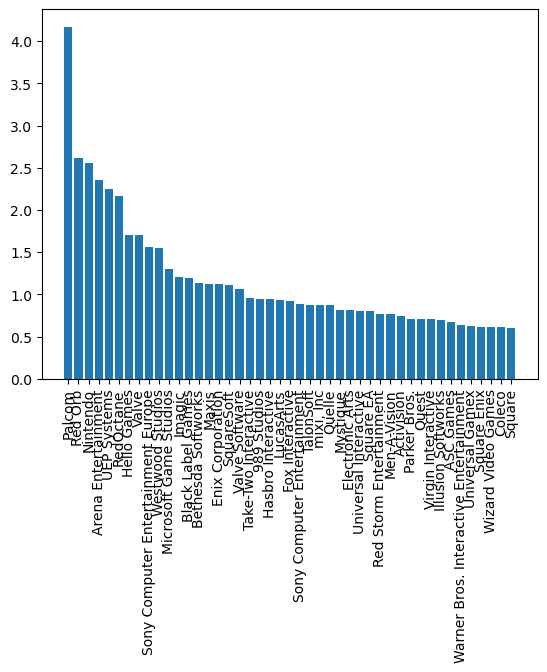

In [7]:
threshold = 0.6
publisher_sales = publisher_sales[publisher_sales['Global_Sales'] > threshold]
plt.bar(publisher_sales['Publisher'], publisher_sales['Global_Sales'])
plt.xticks(rotation=90)

### Conclusion

WHO THE F is Palcom?? Below shows that they made only one game.
Anyways, there is still a relationship between game sales and famous publishers.
We can quantify this relationship with onehotencoding

In [8]:
#TESTING WITH AVERAGE GAME SALES
palcom = sales.drop(sales[sales.Publisher != 'Palcom'].index)
print(palcom)
average = palcom.mean()
print(average)

                             Name Platform   Genre Publisher  Global_Sales
279  Teenage Mutant Ninja Turtles      NES  Action    Palcom          4.17
Global_Sales    4.17
dtype: float64


/var/folders/dm/4n3z0t310nsc78l8052lbflr0000gn/T/ipykernel_42719/2922668731.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average = palcom.mean()


### Graph 3

Lets see if genre has a relationship with sales

In [9]:
sales.shape

(16450, 5)

           Genre  Global_Sales
4       Platform      0.940615
8        Shooter      0.803881
7   Role-Playing      0.627714
6         Racing      0.590294
10        Sports      0.568252
2       Fighting      0.528829
0         Action      0.519235
3           Misc      0.459582
9     Simulation      0.452681
5         Puzzle      0.422373
11      Strategy      0.256835
1      Adventure      0.180557


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Platform'),
  Text(1, 0, 'Shooter'),
  Text(2, 0, 'Role-Playing'),
  Text(3, 0, 'Racing'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Fighting'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Misc'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Adventure')])

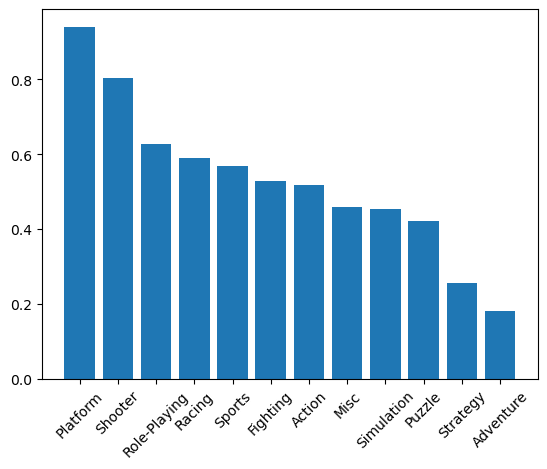

In [10]:
genre_sales = sales.groupby('Genre')['Global_Sales'].mean().reset_index()
genre_sales = genre_sales.sort_values('Global_Sales', ascending=False)
print(genre_sales)

plt.bar(genre_sales['Genre'], genre_sales['Global_Sales'])
plt.xticks(rotation=45)

### Conclusion
Games of certain genres are also anticipated to sell much more.
Again we can trying to quantify with onehotencoding

## More more Preprocess


Looking at the publisher & genre vs. sales graph, we can determine that the genre and publisher might be more important in influencing game sales.

In [11]:
from sklearn.preprocessing import OneHotEncoder

#encoder = OneHotEncoder()
#dummy_data = pd.DataFrame(encoder.fit_transform(sales[['Publisher', 'Genre']]))
dummy_data = pd.get_dummies(sales['Genre'], prefix='Genre')
mod_sales = sales.join(dummy_data)

Remember that the publisher category had 581 publishers. We don't want 581 additional columns, so let's cut the ones that publish games less frequently

In [12]:
#take out 
publisher_counts = mod_sales['Publisher'].value_counts()
less_frequent_publishers = publisher_counts[publisher_counts < 200].index
mod_sales = mod_sales[~mod_sales['Publisher'].isin(less_frequent_publishers)]

In [13]:
mod_sales.shape

(9938, 17)

In [14]:
dummy_data = pd.get_dummies(mod_sales['Publisher'], prefix='Publisher')
mod_sales = pd.concat([mod_sales, dummy_data], axis=1)

In [15]:
mod_sales.head()

,Name,Platform,Genre,Publisher,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Warner Bros. Interactive Entertainment
0,Wii Sports,Wii,Sports,Nintendo,82.53,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Super Mario Bros.,NES,Platform,Nintendo,40.24,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,Racing,Nintendo,35.52,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Wii Sports Resort,Wii,Sports,Nintendo,32.77,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.37,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Training with Random Forest Regression

Let's try to train the data with random forest regression, a regression model suggested by one of the instructors

17 publishers feels like a sweet spot

In [16]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# numerical = mod_sales.drop(['Name','Platform','Genre','Publisher'])
# scaler.fit(numerical)

x = mod_sales.drop(columns=['Name','Platform','Genre','Publisher','Global_Sales'])
y = mod_sales['Global_Sales']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Baseline linear regression model
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

RFR_model = RandomForestRegressor()
RFR_model.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
print("Linear Regression: ")
print("training score:", LR_model.score(x_train,y_train))
print("validation score:", LR_model.score(x_test,y_test))

print("Random Forest Regression: ")
print("training score:", RFR_model.score(x_train,y_train))
print("validation score:", RFR_model.score(x_test,y_test))

Linear Regression: 
training score: 0.0920885071705212
validation score: 0.08576475618167345
Random Forest Regression: 
training score: 0.12964698628777382
validation score: 0.09589857155360493


## Analysis & Improvements

WOW! That model was a piece of crap! In hindsight this does make sense since basically all the numerical data I have left are the encoded categories; it's probably hard to do regression with only 0s and 1s.

So maybe I should add the year of release, and review scores and counts back even though their relationships are weak according to the heatmap

Also maybe I should encode the platforms and ratings, too. Why not? More data should be more beneficial?

## More^3 preprocess

add the review score and count back to the dataset

In [20]:
sales_left = mod_sales.iloc[:, :4]
sales_right = mod_sales.iloc[:, 4:]

review_score_and_count = sales_copy[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Year_of_Release']]

mod_sales = sales_left.join(review_score_and_count)
mod_sales = mod_sales.join(sales_right)

mod_sales.head()

,Name,Platform,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Year_of_Release,Global_Sales,...,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Warner Bros. Interactive Entertainment
0,Wii Sports,Wii,Sports,Nintendo,76.000000,51.000000,8.000000,322.000000,2006.0,82.53,...,0,1,0,0,0,0,0,0,0,0
1,Super Mario Bros.,NES,Platform,Nintendo,68.967679,26.360821,7.125046,162.229908,1985.0,40.24,...,0,1,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,Racing,Nintendo,82.000000,73.000000,8.300000,709.000000,2008.0,35.52,...,0,1,0,0,0,0,0,0,0,0
3,Wii Sports Resort,Wii,Sports,Nintendo,80.000000,73.000000,8.000000,192.000000,2009.0,32.77,...,0,1,0,0,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,68.967679,26.360821,7.125046,162.229908,1996.0,31.37,...,0,1,0,0,0,0,0,0,0,0


## Training with review data

see if it gets better

In [21]:
x = mod_sales.drop(columns=['Name','Platform','Genre','Publisher','Global_Sales'])
y = mod_sales['Global_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

LR_model.fit(x_train, y_train)
RFR_model.fit(x_train, y_train)

print("Linear Regression: ")
print("training score:", LR_model.score(x_train,y_train))
print("validation score:", LR_model.score(x_test,y_test))

print("Random Forest Regression: ")
print("training score:", RFR_model.score(x_train,y_train))
print("validation score:", RFR_model.score(x_test,y_test))

Linear Regression: 
training score: 0.18451548550940644
validation score: 0.13868320955457858
Random Forest Regression: 
training score: 0.7883760535527713
validation score: 0.13517349327531547


## Analysis

Holy it got so much better. To the point of where it makes me wonder if I needed the onehotencoding at all?

Let's do a side experiment to see what happens if I just use review data

In [22]:
x = mod_sales[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Year_of_Release']]
y = mod_sales['Global_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

LR_model.fit(x_train, y_train)
RFR_model.fit(x_train, y_train)

print("Linear Regression: ")
print("training score:", LR_model.score(x_train,y_train))
print("validation score:", LR_model.score(x_test,y_test))

print("Random Forest Regression: ")
print("training score:", RFR_model.score(x_train,y_train))
print("validation score:", RFR_model.score(x_test,y_test))

Linear Regression: 
training score: 0.12100792484979861
validation score: 0.0744675242854902
Random Forest Regression: 
training score: 0.6021169058466063
validation score: 0.08571534582002382


Ok whew I'd be very pissed if this turned out to be better

## More^4 preprocesses

nows lets add the platform encoding too

In [23]:
dummy_data = pd.get_dummies(mod_sales['Platform'], prefix='Platform')
mod_sales = pd.concat([mod_sales, dummy_data], axis=1)

mod_sales.head()

,Name,Platform,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Year_of_Release,Global_Sales,...,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,Wii Sports,Wii,Sports,Nintendo,76.000000,51.000000,8.000000,322.000000,2006.0,82.53,...,0,0,0,0,0,1,0,0,0,0
1,Super Mario Bros.,NES,Platform,Nintendo,68.967679,26.360821,7.125046,162.229908,1985.0,40.24,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,Racing,Nintendo,82.000000,73.000000,8.300000,709.000000,2008.0,35.52,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,Wii,Sports,Nintendo,80.000000,73.000000,8.000000,192.000000,2009.0,32.77,...,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,68.967679,26.360821,7.125046,162.229908,1996.0,31.37,...,0,0,0,0,0,0,0,0,0,0


## Training with platform data

the second stage of the improvements, test training results with platform data encoded

In [35]:
from sklearn.model_selection import cross_val_score

x = mod_sales.drop(columns=['Name','Platform','Genre','Publisher','Global_Sales'])
y = mod_sales['Global_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

LR_model.fit(x_train, y_train)
RFR_model.fit(x_train, y_train)

print("Linear Regression: ")
print("training score:", LR_model.score(x_train,y_train))
print("validation score:", LR_model.score(x_test,y_test))

#k-fold cross validation
scores = cross_val_score(LR_model, x, y, scoring='neg_mean_squared_error')

print(f"cross validation: {scores}")
print(f"Average : {np.mean(scores)}")

print()

print("Random Forest Regression: ")
print("training score:", RFR_model.score(x_train,y_train))
print("validation score:", RFR_model.score(x_test,y_test))

#k-fold cross validation
scores = cross_val_score(RFR_model, x, y, scoring='neg_mean_squared_error')

print(f"cross validation: {scores}")
print(f"Average : {np.mean(scores)}")

Linear Regression: 
training score: 0.21786467822165645
validation score: 0.1518622148747346
cross validation: [-18.27730132  -0.74461018  -0.60129234  -0.43811914  -0.42009359]
Average : -4.09628331453448

Random Forest Regression: 
training score: 0.8107407454495442
validation score: 0.2043978905001297
cross validation: [-18.14362182  -0.87841899  -0.53516417  -0.34539518  -0.28457999]
Average : -4.0374360305934776


## Analysis

The model improved slightly & hit the 80s in score. This feels like the best I can do to optimize the model.

The validation score is still very low, however. The model overfits.


## Training with decision tree regression

Since the previous model does not perform well in terms of predicting new datasets,
let's try the decision tree regression model

In [42]:
from sklearn.tree import DecisionTreeRegressor

R_model = DecisionTreeRegressor(random_state=42)

x = mod_sales.drop(columns=['Name','Platform','Genre','Publisher','Global_Sales'])
y = mod_sales['Global_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

LR_model.fit(x_train, y_train)
R_model.fit(x_train, y_train)

print("Linear Regression: ")
print("training score:", LR_model.score(x_train,y_train))
print("validation score:", R_model.score(x_test,y_test))

#k-fold cross validation
scores = cross_val_score(R_model, x, y, scoring='neg_mean_squared_error')

print(f"cross validation: {scores}")
print(f"Average : {np.mean(scores)}")

print()

print("Decision Tree Regression: ")
print("training score:", R_model.score(x_train,y_train))
print("validation score:", R_model.score(x_test,y_test))

#k-fold cross validation
scores = cross_val_score(R_model, x, y, scoring='neg_mean_squared_error')

print(f"cross validation: {scores}")
print(f"Average : {np.mean(scores)}")

Linear Regression: 
training score: 0.21786467822165645
validation score: -0.045701462538512594
cross validation: [-18.28742669  -2.07600981  -1.07670949  -0.72967669  -0.48835316]
Average : -4.531635169822133

Decision Tree Regression: 
training score: 0.8831352462039719
validation score: -0.045701462538512594
cross validation: [-18.28742669  -2.07600981  -1.07670949  -0.72967669  -0.48835316]
Average : -4.531635169822133


## Analysis

The decision tree model does pretty well in training accuracy, but very poorly in validation.
This is not surprising because the model overfits more easily.


## Conclusion
I have also tries numerous other regression models such as ridge and gradient boosting. Both of them performed very poorly in both training and validation. The decision tree regression model is displayed here because it at least outperformed random forest in training accuracy. For the sake of clarity, results from multiple other models will not be displated.

Without going into more complex preprocessing or feature engineering. The random forest regression model is the best method to predict video game sales.